**Nama : Muhammad Nurul Mustofa**   
**Kelas : TI 3A**   
**Nim : 2241720022**

# **🚨Tugas**
## **Model CNN untuk Klasifikasi Dataset Citra LFW**

**Import Library**

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

**Load Dataset LFW**

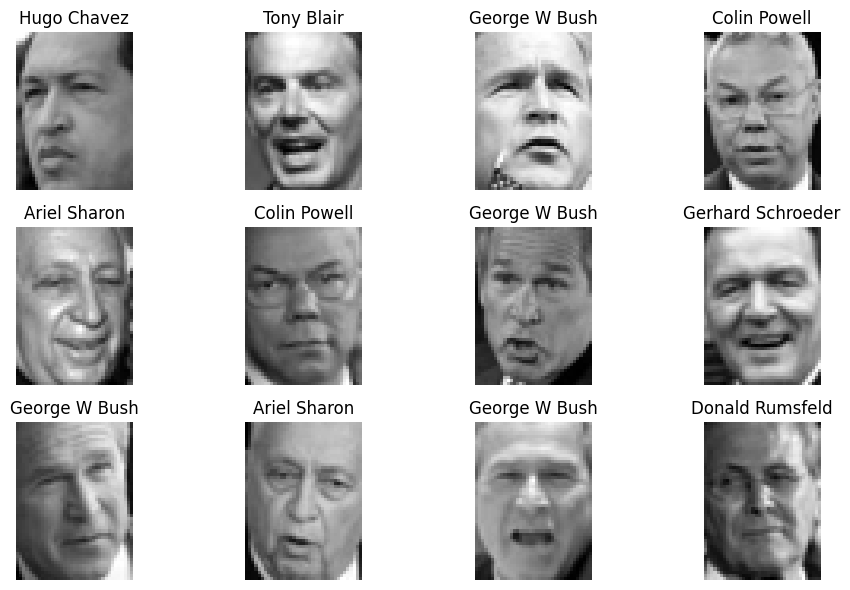

In [ ]:
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_data.images  # Image data
y = lfw_data.target  # Labels
class_names = lfw_data.target_names

# Display example images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Prepocessing**

In [ ]:
# One-hot encode labels using OneHotEncoder
# Replace 'sparse=False' with 'sparse_output=False'
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Membangun Model CNN**

In [ ]:
# Reshape X_train and X_test to add the channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Now, rebuild your model with the updated input shape
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),  # input_shape now includes channels
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Train Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.2111 - loss: 3.9601 - val_accuracy: 0.1117 - val_loss: 2.2066
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.3764 - loss: 2.2385 - val_accuracy: 0.1117 - val_loss: 2.7569
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.4059 - loss: 1.7711 - val_accuracy: 0.1117 - val_loss: 3.5288
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.4204 - loss: 1.6450 - val_accuracy: 0.1117 - val_loss: 3.9025
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.4877 - loss: 1.4853 - val_accuracy: 0.1117 - val_loss: 3.8823
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.4868 - loss: 1.4823 - val_accuracy: 0.1117 - val_loss: 4.0508
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.5425 - loss: 1.3420 - val_accuracy: 0.1117 - val_loss: 3.9488
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.5501 - loss: 1.3356 - val_accuracy: 0.

**Evaluasi Model**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save('lfw_cnn_model_with_onehotencoder.h5')

9/9 - 0s - 44ms/step - accuracy: 0.8333 - loss: 0.5161


Test Accuracy: 0.83


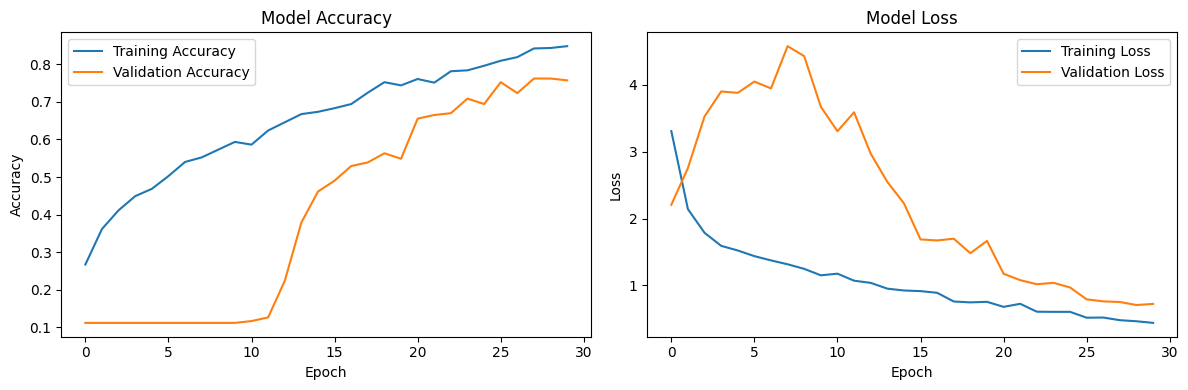

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()